In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
import pandas as pd

In [35]:
fichier_data = '/content/drive/MyDrive/SCORING/bdd_py.csv'

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = pd.read_csv(fichier_data, sep=';')
df = df[['sal','age', 'capital-gain', 'education', 'hours-per-week', 'occupation', 'relationship']]

In [ ]:
df.head()

,sal,age,capital-gain,education,hours-per-week,occupation,relationship
0,<=50K,"[33, 41[",gain,niveau_superieur,<40,qualification_moyenne,Not-in-family
1,<=50K,>50],pas_gain,niveau_superieur,<40,qualification_haute,Husband
2,<=50K,"[33, 41[",pas_gain,primaire_secondaire,<40,qualification_faible,Not-in-family
3,<=50K,>50],pas_gain,primaire_secondaire,<40,qualification_faible,Husband
4,<=50K,"[26,33[",pas_gain,niveau_superieur,<40,qualification_haute,Wife


In [38]:
df['sal'].replace(['<=50K','>50K'],[0,1], inplace=True)

In [39]:

X = df.drop('sal', axis=1)
y=df['sal']

In [40]:
X_dummy = pd.get_dummies(X,prefix_sep="_", drop_first=True)

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.25,
                                                    stratify=y,random_state=0)


In [42]:
X_train.shape
X_test.shape

(8140, 16)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

parametres = {
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.1, 1.0, 10.0]

}


logit = LogisticRegression()

grid_logit = GridSearchCV(logit, param_grid=parametres, cv=StratifiedKFold(n_splits=3))

grid_logit.fit(X_train, y_train)

meilleurs_parametres = grid_logit.best_params_
print("Meilleurs hyperparamètres:", meilleurs_parametres)

val_logit = grid_logit.best_score_
print("Précision moyenne après validation croisée:", val_logit)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Meilleurs hyperparamètres: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Précision moyenne après validation croisée: 0.8345894012499246


In [15]:
print(grid_logit.score(X_test,y_test))
print(grid_logit.score(X_train,y_train))

0.8332923832923833
0.834466377262675


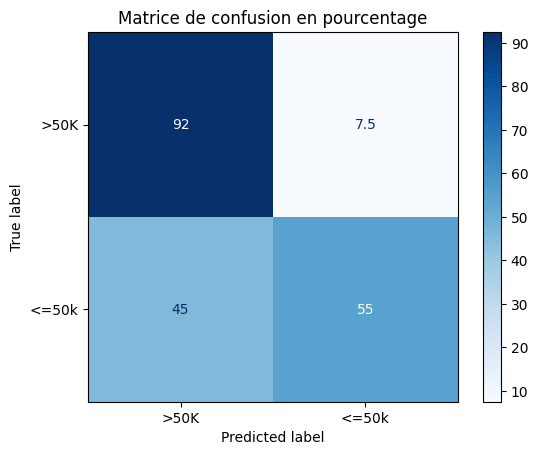

In [44]:




# Prédiction sur les données de test
y_pred = grid_logit.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Calcul des pourcentages dans la matrice de confusion
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100  # Convertir en pourcentage

# Affichage de la matrice de confusion en pourcentage
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=['>50K', '<=50k'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion en pourcentage')
plt.show()


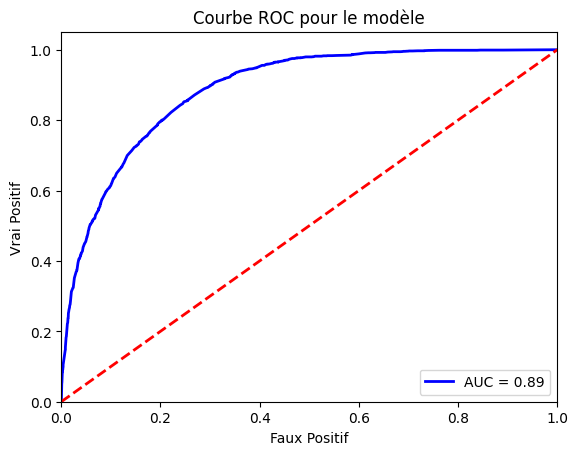

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred_proba):
    le = LabelEncoder()
    y_true_encoded = le.fit_transform(y_true)  # Convertir les étiquettes en valeurs numériques
    fpr, tpr, _ = roc_curve(y_true_encoded, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Faux Positif')
    plt.ylabel('Vrai Positif')
    plt.title('Courbe ROC pour le modèle')
    plt.legend(loc='lower right')
    plt.show()

# Suppose pr contains predicted probabilities and y_test contains true labels
pr = grid_logit.predict_proba(X_test)
pred = pr[:, 1]
plot_roc_curve(y_test, pred)



In [29]:
import statsmodels.api as sm

In [31]:
# on ajoute une colonne pour la constante
stat = sm.add_constant(X_dummy)
# on ajuste le modèle
model = sm.Logit(y, stat)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.351916
         Iterations 9


In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    sal   No. Observations:                32558
Model:                          Logit   Df Residuals:                    32541
Method:                           MLE   Df Model:                           16
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:                  0.3625
Time:                        14:00:33   Log-Likelihood:                -11458.
converged:                       True   LL-Null:                       -17972.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.7429      0.112      6.648      0.000       0.524       0.962
age_[17,26[                         -1.9259      0.108    -17.870      0.000      -2.137      -1.715
age_[26,33[                         -0.7915      0.053    -14.936      0.000      -0.895      -0.688
age_[33, 41[                        -0.1922      0.046     -4.220      0.000      -0.281      -0.103
age_[41,50[                          0.1185      0.045      2.634      0.008       0.030       0.207
capital-gain_pas_gain               -1.5826      0.053    -29.773      0.000      -1.687      -1.478
education_niveau_superieur           0.3677      0.057      6.423      0.000       0.255       0.480
education_primaire_secondaire       -0.8141      0.054    -15.102      0.000      -0.920      -0.708
hours-per-week_>40                   0.6693      0.035     19.367      0.000       0.602       0.737
occupation_qualification_faible      0.4353      0.097      4.466      0.000       0.244       0.626
occupation_qualification_haute       1.3600      0.096     14.158      0.000       1.172       1.548
occupation_qualification_moyenne     0.6061      0.095      6.392      0.000       0.420       0.792
relationship_Not-in-family          -2.0076      0.046    -43.466      0.000      -2.098      -1.917
relationship_Other-relative         -2.2897      0.180    -12.700      0.000      -2.643      -1.936
relationship_Own-child              -2.8733      0.132    -21.765      0.000      -3.132      -2.615
relationship_Unmarried              -2.4914      0.079    -31.418      0.000      -2.647      -2.336
relationship_Wife                    0.3673      0.063      5.836      0.000       0.244       0.491
====================================================================================================
"""

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=0, stratify=y)

clf = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5,7],
}


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


best_estimator.fit(X_train, y_train)
print(best_params)
print(best_estimator)


accuracy = best_estimator.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")



{'max_depth': 7, 'n_estimators': 100}
RandomForestClassifier(max_depth=7, random_state=0)
Accuracy on test set: 0.8339987714987716


In [ ]:
print(best_estimator.score(X_train,y_train))
print(best_estimator.score(X_test,y_test))

0.8348690777854565
0.8339987714987716


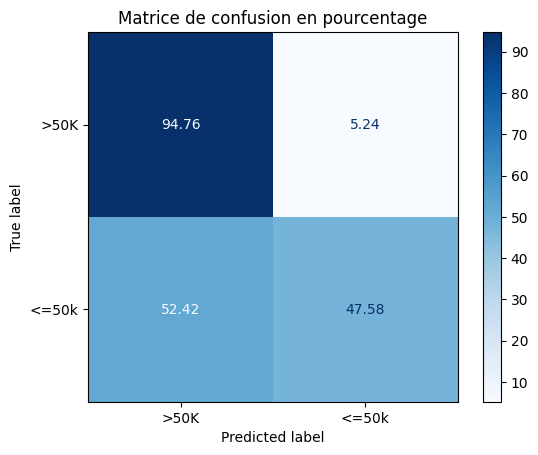

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


y_pred = best_estimator.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


cm_percentage = np.round(cm / cm.sum(axis=1)[:, np.newaxis] * 100, 2)

# Affichage de la matrice de confusion en pourcentage
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=['>50K', '<=50k'])
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Matrice de confusion en pourcentage')
plt.show()



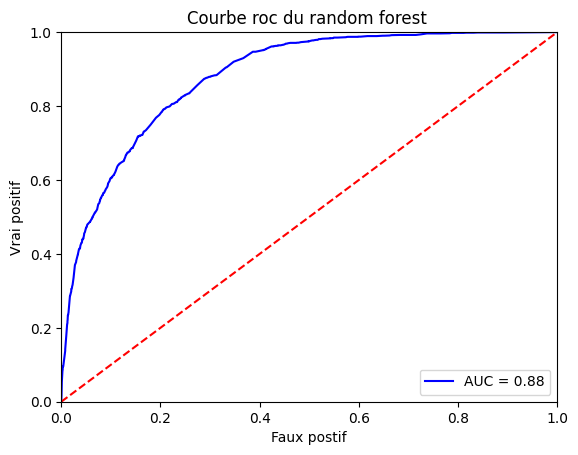

In [ ]:
pr = best_estimator.predict_proba(X_test)
pred = pr[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc = metrics.auc(fpr, tpr)

roc


import matplotlib.pyplot as plt
plt.title('Courbe roc du random forest ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Vrai positif')
plt.xlabel('Faux postif')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.25,
                                                    stratify=y,random_state=0)

gb=GradientBoostingClassifier(n_estimators=100,random_state=1)

gb= gb.fit(X_train, y_train)

In [ ]:
print(gb.score(X_train,y_train))
print(gb.score(X_test,y_test))

0.837374068310263
0.8336609336609336


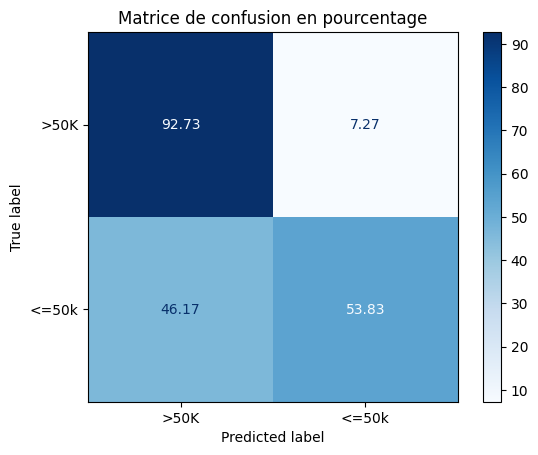

In [ ]:

y_pred = gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


cm_percentage = np.round(cm / cm.sum(axis=1)[:, np.newaxis] * 100, 2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=['>50K', '<=50k'])
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Matrice de confusion en pourcentage')
plt.show()


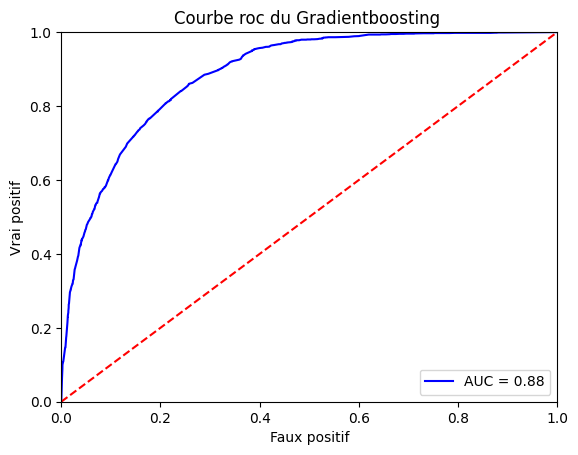

In [ ]:
pr = gr.predict_proba(X_test)
pred = pr[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

roc

# method I: plt
import matplotlib.pyplot as plt
plt.title('Courbe roc du Gradientboosting ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Vrai positif')
plt.xlabel('Faux positif')
plt.show()